# 1、导入数据

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

data_order = pd.read_csv('t_order.csv')
data_ads = pd.read_csv('t_ads.csv')
data_comment = pd.read_csv('t_comment.csv')
data_product = pd.read_csv('t_product.csv', low_memory=False)
data_sales_sum = pd.read_csv('t_sales_sum.csv')

# 2、探索数据

## 2.1 查看商家数

In [2]:
shops_order = data_order[['shop_id']].drop_duplicates()
print('num of shop_order csv: {}'.format(len(shops_order)))

shops_ads = data_ads[['shop_id']].drop_duplicates()
print('num of shop_ads csv: {}'.format(len(shops_ads)))

shops_comment = data_comment[['shop_id']].drop_duplicates()
print('num of shop_comment csv: {}'.format(len(shops_comment)))

shops_product = data_product[['shop_id']].drop_duplicates()
print('num of shop_product csv: {}'.format(len(shops_product)))

shops_sales_sum = data_sales_sum[['shop_id']].drop_duplicates()
print('num of shop_sales_sum csv: {}'.format(len(shops_sales_sum)))

num of shop_order csv: 3000
num of shop_ads csv: 1951
num of shop_comment csv: 3000
num of shop_product csv: 2886
num of shop_sales_sum csv: 3000


In [3]:
shops = shops_order.sort_values(by='shop_id').reset_index(drop=True)
shops

,shop_id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


## 2.2 查看样本日期范围

In [4]:
dt_sales_sum = data_sales_sum[['dt']].drop_duplicates().sort_values(by='dt').reset_index(drop=True)
print(dt_sales_sum)
print(len(data_sales_sum))
print(data_sales_sum['shop_id'].value_counts())

           dt
0  2016-06-30
1  2016-07-31
2  2016-08-31
3  2016-09-30
4  2016-10-31
5  2016-11-30
6  2016-12-31
7  2017-01-31
24030
2205    37
2129     9
2500     8
517      8
2564     8
501      8
2548     8
485      8
2532     8
469      8
2516     8
453      8
437      8
533      8
2484     8
421      8
2468     8
405      8
2452     8
389      8
2436     8
373      8
2420     8
2580     8
2047     8
2404     8
629      8
2756     8
693      8
2740     8
        ..
2827     8
778      8
2811     8
762      8
2795     8
746      8
2939     8
2955     8
1210     8
922      8
1194     8
1178     8
1162     8
1146     8
1130     8
1114     8
1098     8
1082     8
1066     8
1050     8
1034     8
1018     8
1002     8
986      8
970      8
954      8
2987     8
938      8
2971     8
2049     8
Name: shop_id, Length: 3000, dtype: int64


In [5]:
print(len(data_sales_sum[data_sales_sum['shop_id']==2205].drop_duplicates()))
print(len(data_sales_sum[data_sales_sum['shop_id']==2129].drop_duplicates()))

8
8


In [6]:
data_order = data_order.drop_duplicates()
data_ads = data_ads.drop_duplicates()
data_comment = data_comment.drop_duplicates()
data_product = data_product.drop_duplicates()
data_sales_sum = data_sales_sum.drop_duplicates()

In [7]:
data_order_time = data_order[['ord_dt']].drop_duplicates().sort_values(by='ord_dt').reset_index(drop=True)
data_order_time

,ord_dt
0,2016-08-03
1,2016-08-04
2,2016-08-05
3,2016-08-06
4,2016-08-07
5,2016-08-08
6,2016-08-09
7,2016-08-10
8,2016-08-11
9,2016-08-12


可以看出，order数据集一共给出了2016-08-03~2017-04-30共271天，9个月的数据。考虑到样本给出了2016.06.30-2017.01.31的8次预测值。选择利用‘8月+9月’的订单等信息来训练2016.09.30后90天的销售额，‘9月+10月’的订单等信息来训练2016.10.31后90天的销售额，以此类推，至‘12月+1月’的订单等信息来训练2017.01.31后90天的销售额。共5个时间段，选取前四个作为train test，最后一个最为validation test。**最后利用‘3月+4月’的订单等信息来预测2017.04.30后90天的销售额。**

**逐月做特征**

# 3、整理数据

## 3.1 '8'-8阶段

###  3.1.1订单类features

In [8]:
data_order_1_ = data_order[data_order['ord_dt'] <= '2016-08-31']
data_order_1 = data_order_1_[data_order_1_['ord_dt'] >= '2016-08-01']
features_train_1_order = pd.DataFrame()
features_train_1_order['shop_id'] = shops['shop_id']

start = time()
order_1_ord_cnt = data_order_1[['ord_cnt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_sale_amt = data_order_1[['sale_amt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_offer_cnt = data_order_1[['offer_cnt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_offer_amt = data_order_1[['offer_amt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_rtn_cnt = data_order_1[['rtn_cnt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_rtn_amt = data_order_1[['rtn_amt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_1_user_cnt = data_order_1[['user_cnt']].groupby(data_order_1['shop_id']).sum().reset_index()
features_train_1_order = features_train_1_order.merge(order_1_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
end = time()
print('groupby+merge时间：{:.2f}s'.format(end-start))   #0.62s
features_train_1_order

groupby+merge时间：0.34s


,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt
0,1,114.0,14572.27,24.0,239.10,8.0,392.17,114.0
1,2,166.0,14256.50,101.0,327.52,13.0,545.21,166.0
2,3,157.0,23480.19,120.0,349.87,7.0,544.46,157.0
3,4,489.0,52483.56,338.0,340.07,2.0,98.59,489.0
4,5,1004.0,40034.73,989.0,64721.76,4.0,367.15,1004.0
5,6,1449.0,56543.99,562.0,33547.31,9.0,376.26,1449.0
6,7,791.0,50791.65,749.0,13992.48,13.0,392.50,789.0
7,8,730.0,85733.59,616.0,2127.09,7.0,376.72,730.0
8,9,1841.0,88604.08,62.0,625.68,58.0,1061.85,1837.0
9,10,26.0,4413.10,0.0,0.00,2.0,161.13,26.0


### 3.1.2 广告类features

In [9]:
data_ads_1_ = data_ads[data_ads['create_dt'] <= '2016-08-31']
data_ads_1 = data_ads_1_[data_ads_1_['create_dt'] >= '2016-08-01']
features_train_1_ads = pd.DataFrame()
features_train_1_ads['shop_id'] = shops['shop_id']

ads_1_charge = data_ads_1[['charge']].groupby(data_ads_1['shop_id']).sum().reset_index()
features_train_1_ads = features_train_1_ads.merge(ads_1_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_1_consume = data_ads_1[['consume']].groupby(data_ads_1['shop_id']).sum().reset_index()
features_train_1_ads = features_train_1_ads.merge(ads_1_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
features_train_1_ads

,shop_id,charge,consume
0,1,0.00,0.00
1,2,0.00,0.00
2,3,683041.76,71479.40
3,4,0.00,5348.07
4,5,0.00,0.00
5,6,280324.13,112933.57
6,7,0.00,0.00
7,8,931240.82,527730.93
8,9,0.00,0.00
9,10,56653.43,42257.32


### 3.1.3 评论类features

In [10]:
data_comment_1_ = data_comment[data_comment['create_dt'] <= '2016-08-31']
data_comment_1 = data_comment_1_[data_comment_1_['create_dt'] >= '2016-08-01']
features_train_1_comment = pd.DataFrame()
features_train_1_comment['shop_id'] = shops['shop_id']

comment_1_cmmt_num = data_comment_1[['cmmt_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_1_bad_num = data_comment_1[['bad_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_1_mid_num = data_comment_1[['mid_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_1_good_num = data_comment_1[['good_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_1_dis_num = data_comment_1[['dis_num']].groupby(data_comment_1['shop_id']).sum().reset_index()
features_train_1_comment = features_train_1_comment.merge(comment_1_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
features_train_1_comment

,shop_id,cmmt_num,bad_num,mid_num,good_num,dis_num
0,1,26.0,0.0,0.0,26.0,0.0
1,2,17.0,3.0,3.0,11.0,4.0
2,3,16.0,0.0,0.0,16.0,3.0
3,4,178.0,2.0,1.0,175.0,2.0
4,5,11157.0,0.0,1.0,11156.0,0.0
5,6,2121.0,4.0,0.0,2117.0,65.0
6,7,80.0,3.0,6.0,71.0,9.0
7,8,191.0,1.0,5.0,185.0,31.0
8,9,1550.0,2.0,21.0,1527.0,18.0
9,10,5.0,0.0,0.0,5.0,1.0


### 3.1.4 商品类features

In [11]:
data_product_off_dt = data_product['off_dt'].dropna()
print('下架时间种类数：{} '.format(len(data_product_off_dt.drop_duplicates())))
print(data_product_off_dt)

下架时间种类数：1 
55007       2017-05-01
55008       2017-05-01
137440      2017-05-01
281609      2017-05-01
299643      2017-05-01
299644      2017-05-01
299645      2017-05-01
299646      2017-05-01
299647      2017-05-01
299648      2017-05-01
327407      2017-05-01
327408      2017-05-01
327680      2017-05-01
334682      2017-05-01
334683      2017-05-01
334684      2017-05-01
336295      2017-05-01
336296      2017-05-01
336349      2017-05-01
336350      2017-05-01
336354      2017-05-01
336744      2017-05-01
336755      2017-05-01
336756      2017-05-01
336757      2017-05-01
336758      2017-05-01
337261      2017-05-01
337521      2017-05-01
337532      2017-05-01
337533      2017-05-01
               ...    
11328387    2017-05-01
11328388    2017-05-01
11328389    2017-05-01
11328390    2017-05-01
11328391    2017-05-01
11328392    2017-05-01
11328393    2017-05-01
11328394    2017-05-01
11328395    2017-05-01
11328396    2017-05-01
11328397    2017-05-01
11328398    2017-05-01


In [12]:
brands = data_product[['brand']].drop_duplicates()
cates = data_product[['cate']].drop_duplicates()
print('num of brands:{}'.format(len(brands)))
print('num of cates:{}'.format(len(cates)))
brands.sort_values(by='brand')
cates.sort_values(by='cate')

num of brands:3089
num of cates:310


,cate
1336,1
854074,2
11182,3
679525,4
14107,5
132535,6
916,7
99345,8
7432,9
3065,10


In [14]:
start = time()
brand = pd.DataFrame()
brand['shop_id'] = shops['shop_id']
for i in range(1, len(brands)+1):
    brand['brand_{}'.format(i)] = 0
for j in range(1,len(brands)+1):
    brand_list = list(data_product[data_product['shop_id']==j]['brand'])
    for i in set(brand_list):
        brand['brand_{}'.format(i)][j-1] = brand_list.count(i)
end = time()
print('brand特征建立时间：{:.2f}s'.format(end-start)) #55.28s
brand

brand特征建立时间：45.05s


,shop_id,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,...,brand_3080,brand_3081,brand_3082,brand_3083,brand_3084,brand_3085,brand_3086,brand_3087,brand_3088,brand_3089
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
start = time()
cate = pd.DataFrame()
cate['shop_id'] = shops['shop_id']
for i in range(1, len(cates)+1):
    cate['cate_{}'.format(i)] = 0
for j in range(1,len(cates)+1):
    cate_list = list(data_product[data_product['shop_id']==j]['cate'])
    for i in set(cate_list):
        cate['cate_{}'.format(i)][j-1] = cate_list.count(i)
end = time()
print('cate特征建立时间：{:.2f}s'.format(end-start)) #7.08s
cate

cate特征建立时间：4.88s


,shop_id,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,36,0,0,342,0,0,0,0,0


**合并features**,再建立90天**销售额labels**

In [15]:
features_train_1 = features_train_1_order.merge(features_train_1_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_train_1 = features_train_1.merge(features_train_1_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_train_1 = features_train_1.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_train_1 = features_train_1.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')
features_train_1.head()
features_train_1.to_csv('feature/features_1_1m.csv')

建立90天**销售额labels**

In [18]:
data_sales_sum_1 = data_sales_sum[data_sales_sum['dt'] == '2016-08-31']

labels_train_1 = data_sales_sum_1[['sale_amt_3m']].groupby(data_sales_sum_1['shop_id']).sum().reset_index()['sale_amt_3m']*14/15
labels_train_1 

0       313446.653333
1       132354.366667
2       184754.098667
3        94312.101333
4       167333.142667
5       215555.853333
6       261523.089333
7       110352.349333
8       298284.028000
9        13187.486667
10      294928.452000
11      453511.426667
12       46923.744000
13      102772.646667
14       99093.017333
15      234856.580000
16      438265.716000
17       17755.173333
18       88104.333333
19      128865.856000
20       61547.668000
21      147419.057333
22      152677.690667
23      242135.646667
24       31262.737333
25      271290.068000
26      103052.012000
27      744292.901333
28      349672.652000
29       35667.912000
            ...      
2970    279397.421333
2971    121646.858667
2972    326894.941333
2973    151535.010667
2974    400481.900000
2975    254376.481333
2976     26362.177333
2977     71512.522667
2978    224850.556000
2979     37442.972000
2980     30862.430667
2981    350118.589333
2982     77654.061333
2983     43672.234667
2984    13

## 3.2 '9'-9

### 3.2.1 features

In [19]:
start = time()
# order
data_order_2_ = data_order[data_order['ord_dt'] <= '2016-09-31']
data_order_2 = data_order_2_[data_order_2_['ord_dt'] >= '2016-09-01']
features_2_order = pd.DataFrame()
features_2_order['shop_id'] = shops['shop_id']

order_2_ord_cnt = data_order_2[['ord_cnt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_sale_amt = data_order_2[['sale_amt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_offer_cnt = data_order_2[['offer_cnt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_offer_amt = data_order_2[['offer_amt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_rtn_cnt = data_order_2[['rtn_cnt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_rtn_amt = data_order_2[['rtn_amt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_2_user_cnt = data_order_2[['user_cnt']].groupby(data_order_2['shop_id']).sum().reset_index()
features_2_order = features_2_order.merge(order_2_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# ads
data_ads_2_ = data_ads[data_ads['create_dt'] <= '2016-09-31']
data_ads_2 = data_ads_2_[data_ads_2_['create_dt'] >= '2016-09-01']
features_2_ads = pd.DataFrame()
features_2_ads['shop_id'] = shops['shop_id']

ads_2_charge = data_ads_2[['charge']].groupby(data_ads_2['shop_id']).sum().reset_index()
features_2_ads = features_2_ads.merge(ads_2_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_2_consume = data_ads_2[['consume']].groupby(data_ads_2['shop_id']).sum().reset_index()
features_2_ads = features_2_ads.merge(ads_2_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_2_ = data_comment[data_comment['create_dt'] <= '2016-09-31']
data_comment_2 = data_comment_2_[data_comment_2_['create_dt'] >= '2016-09-01']
features_2_comment = pd.DataFrame()
features_2_comment['shop_id'] = shops['shop_id']

comment_2_cmmt_num = data_comment_2[['cmmt_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_2_bad_num = data_comment_2[['bad_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_2_mid_num = data_comment_2[['mid_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_2_good_num = data_comment_2[['good_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_2_dis_num = data_comment_2[['dis_num']].groupby(data_comment_2['shop_id']).sum().reset_index()
features_2_comment = features_2_comment.merge(comment_2_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_2 = features_2_order.merge(features_2_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_2 = features_2.merge(features_2_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_2 = features_2.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_2 = features_2.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')

end = time()
print('one period features established time: {:.2f}s'.format(end-start))

start = time()
features_2.to_csv('feature/features_2_1m.csv')

end = time()
print('one period features saved time: {:.2f}s'.format(end-start))
features_2.head()

one period features established time: 1.76s
one period features saved time: 5.03s


,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,582,66341.91,218,3663.48,16,903.05,582,95795.81,101653.74,...,0,0,0,0,0,0,0,0,0,0
1,2,339,36401.95,69,316.01,18,942.49,338,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,3,350,47043.93,270,4927.82,13,924.85,350,272966.55,68075.60,...,0,0,0,0,0,0,0,0,0,0
3,4,417,48558.61,146,154.74,0,0.00,417,0.00,6561.22,...,0,0,0,0,0,0,0,0,0,0
4,5,722,57747.79,707,44301.11,5,342.00,722,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


### 3.2.2 labels

In [20]:
data_sales_sum_2 = data_sales_sum[data_sales_sum['dt'] == '2016-09-30']

labels_2 = data_sales_sum_2[['sale_amt_3m']].groupby(data_sales_sum_2['shop_id']).sum().reset_index()['sale_amt_3m']

## 3.3 '10'-10

### 3.3.1 features

In [21]:
# order
data_order_3_ = data_order[data_order['ord_dt'] <= '2016-10-31']
data_order_3 = data_order_3_[data_order_3_['ord_dt'] >= '2016-10-01']
features_3_order = pd.DataFrame()
features_3_order['shop_id'] = shops['shop_id']

order_3_ord_cnt = data_order_3[['ord_cnt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_sale_amt = data_order_3[['sale_amt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_offer_cnt = data_order_3[['offer_cnt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_offer_amt = data_order_3[['offer_amt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_rtn_cnt = data_order_3[['rtn_cnt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_rtn_amt = data_order_3[['rtn_amt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_3_user_cnt = data_order_3[['user_cnt']].groupby(data_order_3['shop_id']).sum().reset_index()
features_3_order = features_3_order.merge(order_3_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# ads
data_ads_3_ = data_ads[data_ads['create_dt'] <= '2016-10-31']
data_ads_3 = data_ads_3_[data_ads_3_['create_dt'] >= '2016-10-01']
features_3_ads = pd.DataFrame()
features_3_ads['shop_id'] = shops['shop_id']

ads_3_charge = data_ads_3[['charge']].groupby(data_ads_3['shop_id']).sum().reset_index()
features_3_ads = features_3_ads.merge(ads_3_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_3_consume = data_ads_3[['consume']].groupby(data_ads_3['shop_id']).sum().reset_index()
features_3_ads = features_3_ads.merge(ads_3_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_3_ = data_comment[data_comment['create_dt'] <= '2016-10-31']
data_comment_3 = data_comment_3_[data_comment_3_['create_dt'] >= '2016-10-01']
features_3_comment = pd.DataFrame()
features_3_comment['shop_id'] = shops['shop_id']

comment_3_cmmt_num = data_comment_3[['cmmt_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_3_bad_num = data_comment_3[['bad_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_3_mid_num = data_comment_3[['mid_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_3_good_num = data_comment_3[['good_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_3_dis_num = data_comment_3[['dis_num']].groupby(data_comment_3['shop_id']).sum().reset_index()
features_3_comment = features_3_comment.merge(comment_3_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_3 = features_3_order.merge(features_3_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_3 = features_3.merge(features_3_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_3 = features_3.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_3 = features_3.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')
features_3.head()
features_3.to_csv('feature/features_3_1m.csv')

### 3.3.2 labels

In [22]:
data_sales_sum_3 = data_sales_sum[data_sales_sum['dt'] == '2016-10-31']

labels_3 = data_sales_sum_3[['sale_amt_3m']].groupby(data_sales_sum_3['shop_id']).sum().reset_index()['sale_amt_3m']

## 3.4 '11'-11

### 3.4.1 features

In [26]:
# order
data_order_4_ = data_order[data_order['ord_dt'] <= '2016-11-31']
data_order_4 = data_order_4_[data_order_4_['ord_dt'] >= '2016-11-01']
features_4_order = pd.DataFrame()
features_4_order['shop_id'] = shops['shop_id']

order_4_ord_cnt = data_order_4[['ord_cnt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_sale_amt = data_order_4[['sale_amt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_offer_cnt = data_order_4[['offer_cnt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_offer_amt = data_order_4[['offer_amt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_rtn_cnt = data_order_4[['rtn_cnt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_rtn_amt = data_order_4[['rtn_amt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_4_user_cnt = data_order_4[['user_cnt']].groupby(data_order_4['shop_id']).sum().reset_index()
features_4_order = features_4_order.merge(order_4_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# ads
data_ads_4_ = data_ads[data_ads['create_dt'] <= '2016-11-31']
data_ads_4 = data_ads_4_[data_ads_4_['create_dt'] >= '2016-11-01']
features_4_ads = pd.DataFrame()
features_4_ads['shop_id'] = shops['shop_id']

ads_4_charge = data_ads_4[['charge']].groupby(data_ads_4['shop_id']).sum().reset_index()
features_4_ads = features_4_ads.merge(ads_4_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_4_consume = data_ads_4[['consume']].groupby(data_ads_4['shop_id']).sum().reset_index()
features_4_ads = features_4_ads.merge(ads_4_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_4_ = data_comment[data_comment['create_dt'] <= '2016-11-31']
data_comment_4 = data_comment_4_[data_comment_4_['create_dt'] >= '2016-11-01']
features_4_comment = pd.DataFrame()
features_4_comment['shop_id'] = shops['shop_id']

comment_4_cmmt_num = data_comment_4[['cmmt_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_4_bad_num = data_comment_4[['bad_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_4_mid_num = data_comment_4[['mid_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_4_good_num = data_comment_4[['good_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_4_dis_num = data_comment_4[['dis_num']].groupby(data_comment_4['shop_id']).sum().reset_index()
features_4_comment = features_4_comment.merge(comment_4_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_4 = features_4_order.merge(features_4_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_4 = features_4.merge(features_4_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_4 = features_4.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_4 = features_4.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')
features_4.head()
features_4.to_csv('feature/features_4_1m.csv')


### 3.4.2 labels

In [27]:
data_sales_sum_4 = data_sales_sum[data_sales_sum['dt'] == '2016-11-30']

labels_4 = data_sales_sum_4[['sale_amt_3m']].groupby(data_sales_sum_4['shop_id']).sum().reset_index()['sale_amt_3m']

## 3.5 '12'-12

### 3.5.1 features

In [28]:
# order
data_order_5_ = data_order[data_order['ord_dt'] <= '2016-12-31']
data_order_5 = data_order_5_[data_order_5_['ord_dt'] >= '2016-12-01']
features_5_order = pd.DataFrame()
features_5_order['shop_id'] = shops['shop_id']

order_5_ord_cnt = data_order_5[['ord_cnt']].groupby(data_order_5['shop_id']).sum().reset_index()
features_5_order = features_5_order.merge(order_5_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_5_sale_amt = data_order_5[['sale_amt']].groupby(data_order_5['shop_id']).sum().reset_index()
features_5_order = features_5_order.merge(order_5_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_5_offer_cnt = data_order_5[['offer_cnt']].groupby(data_order_5['shop_id']).sum().reset_index()
features_5_order = features_5_order.merge(order_5_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_5_offer_amt = data_order_5[['offer_amt']].groupby(data_order_5['shop_id']).sum().reset_index()
features_5_order = features_5_order.merge(order_5_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_5_rtn_cnt = data_order_5[['rtn_cnt']].groupby(data_order_5['shop_id']).sum().reset_index()
features_5_order = features_5_order.merge(order_5_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_5_rtn_amt = data_order_5[['rtn_amt']].groupby(data_order_5['shop_id']).sum().reset_index()
features_5_order = features_5_order.merge(order_5_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_5_user_cnt = data_order_5[['user_cnt']].groupby(data_order_5['shop_id']).sum().reset_index()
features_5_order = features_5_order.merge(order_5_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# ads
data_ads_5_ = data_ads[data_ads['create_dt'] <= '2016-12-31']
data_ads_5 = data_ads_5_[data_ads_5_['create_dt'] >= '2016-12-01']
features_5_ads = pd.DataFrame()
features_5_ads['shop_id'] = shops['shop_id']

ads_5_charge = data_ads_5[['charge']].groupby(data_ads_5['shop_id']).sum().reset_index()
features_5_ads = features_5_ads.merge(ads_5_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_5_consume = data_ads_5[['consume']].groupby(data_ads_5['shop_id']).sum().reset_index()
features_5_ads = features_5_ads.merge(ads_5_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_5_ = data_comment[data_comment['create_dt'] <= '2016-12-31']
data_comment_5 = data_comment_5_[data_comment_5_['create_dt'] >= '2016-12-01']
features_5_comment = pd.DataFrame()
features_5_comment['shop_id'] = shops['shop_id']

comment_5_cmmt_num = data_comment_5[['cmmt_num']].groupby(data_comment_5['shop_id']).sum().reset_index()
features_5_comment = features_5_comment.merge(comment_5_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_5_bad_num = data_comment_5[['bad_num']].groupby(data_comment_5['shop_id']).sum().reset_index()
features_5_comment = features_5_comment.merge(comment_5_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_5_mid_num = data_comment_5[['mid_num']].groupby(data_comment_5['shop_id']).sum().reset_index()
features_5_comment = features_5_comment.merge(comment_5_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_5_good_num = data_comment_5[['good_num']].groupby(data_comment_5['shop_id']).sum().reset_index()
features_5_comment = features_5_comment.merge(comment_5_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_5_dis_num = data_comment_5[['dis_num']].groupby(data_comment_5['shop_id']).sum().reset_index()
features_5_comment = features_5_comment.merge(comment_5_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_5 = features_5_order.merge(features_5_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_5 = features_5.merge(features_5_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_5 = features_5.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_5 = features_5.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')
features_5.head()
features_5.to_csv('feature/features_5_1m.csv')


In [31]:
data_sales_sum_5 = data_sales_sum[data_sales_sum['dt'] == '2016-12-31']

labels_5 = data_sales_sum_5[['sale_amt_3m']].groupby(data_sales_sum_5['shop_id']).sum().reset_index()['sale_amt_3m']

## 3.6 ‘1’-1

### 3.6.1 features

In [30]:
# order
data_order_6_ = data_order[data_order['ord_dt'] <= '2017-01-31']
data_order_6 = data_order_6_[data_order_6_['ord_dt'] >= '2017-01-01']
features_6_order = pd.DataFrame()
features_6_order['shop_id'] = shops['shop_id']

order_6_ord_cnt = data_order_6[['ord_cnt']].groupby(data_order_6['shop_id']).sum().reset_index()
features_6_order = features_6_order.merge(order_6_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_6_sale_amt = data_order_6[['sale_amt']].groupby(data_order_6['shop_id']).sum().reset_index()
features_6_order = features_6_order.merge(order_6_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_6_offer_cnt = data_order_6[['offer_cnt']].groupby(data_order_6['shop_id']).sum().reset_index()
features_6_order = features_6_order.merge(order_6_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_6_offer_amt = data_order_6[['offer_amt']].groupby(data_order_6['shop_id']).sum().reset_index()
features_6_order = features_6_order.merge(order_6_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_6_rtn_cnt = data_order_6[['rtn_cnt']].groupby(data_order_6['shop_id']).sum().reset_index()
features_6_order = features_6_order.merge(order_6_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_6_rtn_amt = data_order_6[['rtn_amt']].groupby(data_order_6['shop_id']).sum().reset_index()
features_6_order = features_6_order.merge(order_6_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_6_user_cnt = data_order_6[['user_cnt']].groupby(data_order_6['shop_id']).sum().reset_index()
features_6_order = features_6_order.merge(order_6_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# ads
data_ads_6_ = data_ads[data_ads['create_dt'] <= '2017-01-31']
data_ads_6 = data_ads_6_[data_ads_6_['create_dt'] >= '2017-01-01']
features_6_ads = pd.DataFrame()
features_6_ads['shop_id'] = shops['shop_id']

ads_6_charge = data_ads_6[['charge']].groupby(data_ads_6['shop_id']).sum().reset_index()
features_6_ads = features_6_ads.merge(ads_6_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_6_consume = data_ads_6[['consume']].groupby(data_ads_6['shop_id']).sum().reset_index()
features_6_ads = features_6_ads.merge(ads_6_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_6_ = data_comment[data_comment['create_dt'] <= '2017-01-31']
data_comment_6 = data_comment_6_[data_comment_6_['create_dt'] >= '2017-01-01']
features_6_comment = pd.DataFrame()
features_6_comment['shop_id'] = shops['shop_id']

comment_6_cmmt_num = data_comment_6[['cmmt_num']].groupby(data_comment_6['shop_id']).sum().reset_index()
features_6_comment = features_6_comment.merge(comment_6_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_6_bad_num = data_comment_6[['bad_num']].groupby(data_comment_6['shop_id']).sum().reset_index()
features_6_comment = features_6_comment.merge(comment_6_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_6_mid_num = data_comment_6[['mid_num']].groupby(data_comment_6['shop_id']).sum().reset_index()
features_6_comment = features_6_comment.merge(comment_6_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_6_good_num = data_comment_6[['good_num']].groupby(data_comment_6['shop_id']).sum().reset_index()
features_6_comment = features_6_comment.merge(comment_6_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_6_dis_num = data_comment_6[['dis_num']].groupby(data_comment_6['shop_id']).sum().reset_index()
features_6_comment = features_6_comment.merge(comment_6_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_6 = features_6_order.merge(features_6_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_6 = features_6.merge(features_6_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_6 = features_6.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_6 = features_6.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')
features_6.head()
features_6.to_csv('feature/features_6_1m.csv')


In [32]:
data_sales_sum_6 = data_sales_sum[data_sales_sum['dt'] == '2017-01-31']

labels_6 = data_sales_sum_6[['sale_amt_3m']].groupby(data_sales_sum_6['shop_id']).sum().reset_index()['sale_amt_3m']

## 3.6 test features

In [33]:
# order
data_order_test_ = data_order[data_order['ord_dt'] <= '2017-04-31']
data_order_test = data_order_test_[data_order_test_['ord_dt'] >= '2017-04-01']
features_test_order = pd.DataFrame()
features_test_order['shop_id'] = shops['shop_id']

start = time()
order_test_ord_cnt = data_order_test[['ord_cnt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_ord_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_sale_amt = data_order_test[['sale_amt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_sale_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_offer_cnt = data_order_test[['offer_cnt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_offer_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_offer_amt = data_order_test[['offer_amt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_offer_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_rtn_cnt = data_order_test[['rtn_cnt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_rtn_cnt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_rtn_amt = data_order_test[['rtn_amt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_rtn_amt,left_on='shop_id', right_on='shop_id', how='outer')

order_test_user_cnt = data_order_test[['user_cnt']].groupby(data_order_test['shop_id']).sum().reset_index()
features_test_order = features_test_order.merge(order_test_user_cnt,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)
end = time()
print('groupby+merge时间：{:.2f}s'.format(end-start))   #0.57s


# ads
data_ads_test_ = data_ads[data_ads['create_dt'] <= '2017-04-31']
data_ads_test = data_ads_test_[data_ads_test_['create_dt'] >= '2017-04-01']
features_test_ads = pd.DataFrame()
features_test_ads['shop_id'] = shops['shop_id']

ads_test_charge = data_ads_test[['charge']].groupby(data_ads_test['shop_id']).sum().reset_index()
features_test_ads = features_test_ads.merge(ads_test_charge,left_on='shop_id', right_on='shop_id', how='outer')

ads_test_consume = data_ads_test[['consume']].groupby(data_ads_test['shop_id']).sum().reset_index()
features_test_ads = features_test_ads.merge(ads_test_consume,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# comments
data_comment_test_ = data_comment[data_comment['create_dt'] <= '2017-04-31']
data_comment_test = data_comment_test_[data_comment_test_['create_dt'] >= '2017-04-01']
features_test_comment = pd.DataFrame()
features_test_comment['shop_id'] = shops['shop_id']

comment_test_cmmt_num = data_comment_test[['cmmt_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_cmmt_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_test_bad_num = data_comment_test[['bad_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_bad_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_test_mid_num = data_comment_test[['mid_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_mid_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_test_good_num = data_comment_test[['good_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_good_num,left_on='shop_id', right_on='shop_id', how='outer')

comment_test_dis_num = data_comment_test[['dis_num']].groupby(data_comment_test['shop_id']).sum().reset_index()
features_test_comment = features_test_comment.merge(comment_test_dis_num,left_on='shop_id', right_on='shop_id', how='outer').fillna(0)


# products , 公用


# 合并features
features_test = features_test_order.merge(features_test_ads, left_on='shop_id', right_on='shop_id', how='outer')
features_test = features_test.merge(features_test_comment, left_on='shop_id', right_on='shop_id', how='outer')
features_test = features_test.merge(brand, left_on='shop_id', right_on='shop_id', how='outer')
features_test = features_test.merge(cate, left_on='shop_id', right_on='shop_id', how='outer')

features_test.to_csv('feature/features_test_1m.csv', index=None)
features_test

groupby+merge时间：0.35s


,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,529,64165.42,62,500.46,25,1373.29,528,0.00,9414.18,...,0,0,0,0,0,0,0,0,0,0
1,2,539,36481.89,60,252.08,9,444.40,537,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,3,334,50663.40,75,583.98,24,1603.88,334,528642.76,305907.24,...,0,0,0,0,0,0,0,0,0,0
3,4,226,24042.49,22,314.28,3,57.43,225,286945.96,299319.31,...,0,0,0,0,0,0,0,0,0,0
4,5,218,30908.13,217,2058.45,8,591.35,218,27039.14,11325.37,...,0,0,0,0,0,0,0,0,0,0
5,6,296,13505.42,123,6631.68,0,0.00,296,0.00,8270.53,...,0,0,0,0,0,0,0,0,0,0
6,7,1267,67398.75,1226,24919.01,8,207.62,1266,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
7,8,561,66669.80,443,18275.89,9,471.78,561,526547.30,510186.51,...,0,0,0,0,0,0,0,0,0,0
8,9,2062,182436.90,1968,8314.40,17,711.33,2062,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
9,10,72,11150.50,46,180.32,1,73.21,72,0.00,0.00,...,0,36,0,0,342,0,0,0,0,0


合并

In [34]:
features_train = pd.concat([features_train_1, features_2, features_3, features_4, features_5, features_6]).reset_index(drop=True)

labels_train = pd.concat([labels_train_1, labels_2, labels_3, labels_4,labels_5,labels_6]).reset_index(drop=True)

features_train.to_csv('feature/features_1m.csv', index=None)

labels_train.to_csv('feature/labels_1m.csv')

In [36]:
features_train

,shop_id,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,1,114.0,14572.27,24.0,239.10,8.0,392.17,114.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2,166.0,14256.50,101.0,327.52,13.0,545.21,166.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,3,157.0,23480.19,120.0,349.87,7.0,544.46,157.0,683041.76,71479.40,...,0,0,0,0,0,0,0,0,0,0
3,4,489.0,52483.56,338.0,340.07,2.0,98.59,489.0,0.00,5348.07,...,0,0,0,0,0,0,0,0,0,0
4,5,1004.0,40034.73,989.0,64721.76,4.0,367.15,1004.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
5,6,1449.0,56543.99,562.0,33547.31,9.0,376.26,1449.0,280324.13,112933.57,...,0,0,0,0,0,0,0,0,0,0
6,7,791.0,50791.65,749.0,13992.48,13.0,392.50,789.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
7,8,730.0,85733.59,616.0,2127.09,7.0,376.72,730.0,931240.82,527730.93,...,0,0,0,0,0,0,0,0,0,0
8,9,1841.0,88604.08,62.0,625.68,58.0,1061.85,1837.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
9,10,26.0,4413.10,0.0,0.00,2.0,161.13,26.0,56653.43,42257.32,...,0,36,0,0,342,0,0,0,0,0


# 4、特征的优化

In [25]:
features_train = pd.concat([features_train_1, features_2, features_3, features_4]).reset_index(drop=True)

# labels_train = labels_train_1.append(labels_2, ignore_index=True)
# labels_train = labels_train.append(labels_3, ignore_index=True)
# labels_train = labels_train.append(labels_4, ignore_index=True)
labels_train = pd.concat([labels_train_1, labels_2, labels_3, labels_4]).reset_index(drop=True)
labels_train.describe()
print(features_train)
features_train.to_csv('features_train.csv', index=None)
labels_train.to_csv('labels_train.csv')
labels_val.to_csv('labels_val.csv')

       shop_id  ord_cnt   sale_amt  offer_cnt   offer_amt  rtn_cnt   rtn_amt  \
0            1      696   80914.18        242     3902.58       24   1295.22   
1            2      505   50658.45        170      643.53       31   1487.70   
2            3      507   70524.12        390     5277.69       20   1469.31   
3            4      906  101042.17        484      494.81        2     98.59   
4            5     1726   97782.52       1696   109022.87        9    709.15   
5            6     3523  127488.04       1252    72803.91       17    635.98   
6            7     2093  134035.19       2007    40109.65       18    515.73   
7            8     1320  157292.95       1014     3793.25       18   1002.85   
8            9     3413  159075.84        956     6461.44      110   1973.73   
9           10       51    8721.92         16       91.33        4    340.65   
10          11      531  102384.43         22      143.52       27   2529.55   
11          12     3283  199246.40      

In [26]:
features_train = features_train.drop(['shop_id'], axis=1)
features_val = features_val.drop(['shop_id'], axis=1)
features_train.describe()

,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,cmmt_num,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
count,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,12000.000000,...,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1945.198833,1.417615e+05,1101.028500,3.871485e+04,43.241667,2464.010726,1941.107167,2.507390e+07,4.993121e+05,2507.523500,...,0.0,0.012000,0.386000,0.037333,2.172667,0.816000,1.092667,0.022000,0.039667,0.055333
std,2448.554289,1.375201e+05,1720.184745,1.241743e+05,74.581013,5179.559141,2440.758687,1.735788e+09,1.582997e+06,6200.136013,...,0.0,0.657185,12.379786,1.747053,49.076650,31.600538,46.155523,0.681827,1.353605,2.123515
min,4.000000,6.781200e+02,0.000000,0.000000e+00,0.000000,0.000000,4.000000,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,448.000000,4.516641e+04,92.000000,7.998550e+02,10.000000,450.982500,447.000000,0.000000e+00,0.000000e+00,172.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1137.000000,9.521869e+04,447.000000,6.262550e+03,24.000000,1124.505000,1134.000000,0.000000e+00,0.000000e+00,601.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2523.500000,1.958375e+05,1436.000000,3.337760e+04,52.000000,2566.507500,2518.000000,3.915065e+05,2.688084e+05,2170.250000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27541.000000,3.374500e+06,23566.000000,4.647422e+06,2619.000000,134852.480000,27199.000000,1.339091e+11,3.468797e+07,154248.000000,...,0.0,36.000000,540.000000,94.000000,2274.000000,1608.000000,2488.000000,34.000000,63.000000,111.000000


In [27]:
features_train = features_train.apply(lambda x: np.log(x+1))
columns = features_train.columns
from sklearn.preprocessing import MinMaxScaler
features_train[columns] = MinMaxScaler().fit_transform(features_train[columns])
# features_train.describe()

features_val = features_val.apply(lambda x: np.log(x+1))
features_val[columns] = MinMaxScaler().fit_transform(features_val[columns])

# 5、可视化

In [28]:
shops_sales_amt_3m = []
for i in range(len(shops)):
    shop_data = data_sales_sum[data_sales_sum['shop_id']==(i+1)].sort_values('dt')['sale_amt_3m'].tolist()
    shops_sales_amt_3m.append(shop_data)
    
shops_sales_amt_3m

[[87360.95,
  196326.0,
  335835.7,
  404198.61,
  382664.23,
  306535.85,
  248421.73,
  219097.84],
 [47995.5,
  99079.11,
  141808.25,
  144865.94,
  90416.49,
  59019.46,
  55028.44,
  79214.06],
 [100554.27,
  122139.45,
  197950.82,
  272725.95,
  290275.52,
  223530.49,
  150484.42,
  134667.29],
 [166206.97,
  137186.21,
  101048.68,
  61281.42,
  25298.68,
  22308.22,
  27053.83,
  47633.91],
 [86644.19,
  168442.46,
  179285.51,
  137437.72,
  61583.6,
  74634.97,
  193567.19,
  233025.51],
 [186674.05,
  198063.41,
  230952.7,
  234260.2,
  192902.92,
  126288.64,
  108612.0,
  105927.87],
 [203460.54,
  211102.41,
  280203.31,
  264040.95,
  197041.53,
  117170.42,
  112560.43,
  189101.04],
 [243730.3,
  180197.0,
  118234.66,
  123871.31,
  131577.81,
  146119.9,
  154564.16,
  207094.16],
 [259035.17,
  231999.75,
  319590.03,
  398272.43,
  384739.81,
  299748.9,
  323180.44,
  447212.23],
 [16652.74,
  11424.45,
  14129.45,
  15691.5,
  15058.82,
  14795.34,
  23460.76

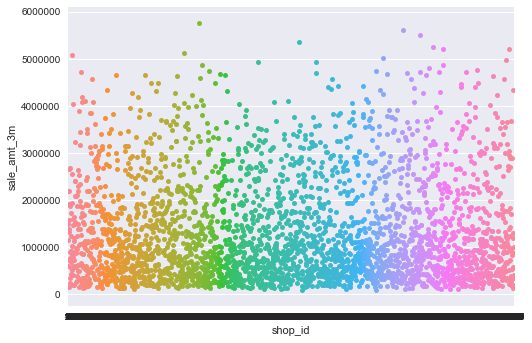

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.swarmplot(x=shops['shop_id'], y=data_sales_sum.groupby(['shop_id'])[['sale_amt_3m']].sum()['sale_amt_3m'])

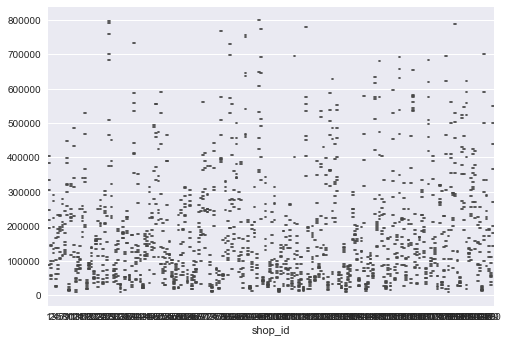

In [31]:
time_points = ['2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31']
sns.violinplot(x=shops['shop_id'][:200], y=shops_sales_amt_3m[:200], size=10, aspect=0.5)

In [31]:
def plot_shops(shops_data):
    plt.figure()
    plt.rc('figure', figsize=(10,7))
    
    x = range(1, 9)
    time_points = ['2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31']
    
    stable = []
    if isinstance(shops_data[0], list) == True:
        for i in range(len(shops_data)):
            if (max(shops_data[i]) - min(shops_data[i])) <= 200000:
                plt.plot(x, shops_data[i], color='g')
            else:
                plt.plot(x, shops_data[i], color='b')
        plt.title('shops sale_amt_3m trend', fontsize=16, y=1.05)
    else:
        mean = np.array(shops_data).mean()
        plt.plot([1, 8], [mean, mean], 'r', linestyle='--')
        plt.plot(x, shops_data)
        plt.title('shop sale_amt_3m trend', fontsize=16, y=1.05)
        
    plt.xlabel('time to 90 days', fontsize=14)
    plt.ylabel('sale_amt_3m(yuan)', fontsize=14)
    plt.xticks(x, time_points, rotation=10, fontsize=10)
    
    plt.show() 

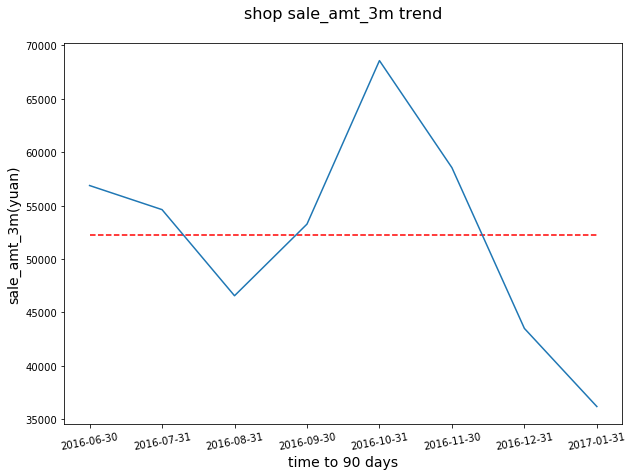

In [41]:
plot_shops(shops_sales_amt_3m[1148])